In [1]:
%matplotlib inline
import pandas as pd

In [2]:
df = pd.read_csv('stats.csv')
df.head()

,time,sizex,sizey,sizez,filltype,fill,ndatapts,ttotal,tksearch,tfrsearch,tprocessing
0,2018-12-03T12:33:58.404637,0.005,0.01,0.005,cluster,0.125,31250,7.46484,0.037228,0.023862,7.38841
1,2018-12-03T12:34:06.438229,0.005,0.01,0.005,cluster,0.125,31250,7.18098,0.039670,0.023745,7.10491
2,2018-12-03T12:34:14.232467,0.005,0.01,0.005,cluster,0.125,31250,7.03559,0.034116,0.021830,6.96656
3,2018-12-03T12:34:22.242886,0.005,0.01,0.005,cluster,0.343,85750,12.75800,0.045625,0.032012,12.66610
4,2018-12-03T12:34:35.795165,0.005,0.01,0.005,cluster,0.343,85750,12.73210,0.043831,0.030755,12.64710


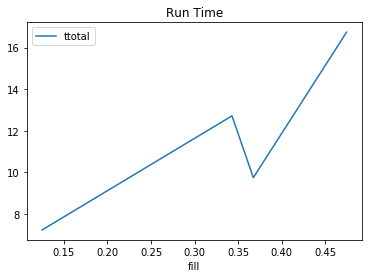

In [19]:
df.groupby('fill').mean().plot(y='ttotal',
                               title='Run Time');

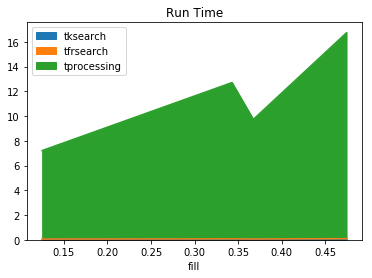

In [20]:
df.groupby('fill').mean().plot(kind='area',
                               y=['tksearch',
                                  'tfrsearch',
                                  'tprocessing'],
                               title='Run Time');

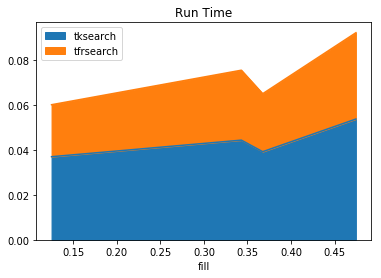

In [21]:
df.groupby('fill').mean().plot(kind='area',
                               y=['tksearch',
                                  'tfrsearch'],
                               title='Run Time');